In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar datos


In [2]:
df = pd.read_csv('./01_Datos_clima.csv')
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [4]:
df_copy = df.copy()
ts = pd.to_datetime(df_copy['Date/Time'])
df_copy['Date/Time'] = ts
df_copy.set_index('Date/Time', inplace=True)
df_copy.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


Determinar la cantidad de datos nulos


In [5]:
df_copy.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [6]:
df.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [7]:
df_copy.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [ ]:
df_copy.index.month

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(x=df_copy.index.month, y=df_copy['Temp_C'], data=df_copy)
plt.show()

In [9]:
def graficar_plot(column, name):
    fig, axes = plt.subplots(2,figsize=(10, 6))
    sns.lineplot(x=df_copy.index.month, y=df_copy[column], data=df_copy, ax = axes[0])
    sns.barplot(x=df_copy.index.month, y=df_copy[column],ax = axes[1])
    plt.savefig(f'./graficas/{name}.png')

In [ ]:
for col in df_copy.columns[1:6]:
    graficar_plot(col,col.replace(" ", "_").replace("/", "_"))

4. Determinar si existen datos atipicos empleando BoxPlots sobre cada variable (columna) para todos los registros (filas)

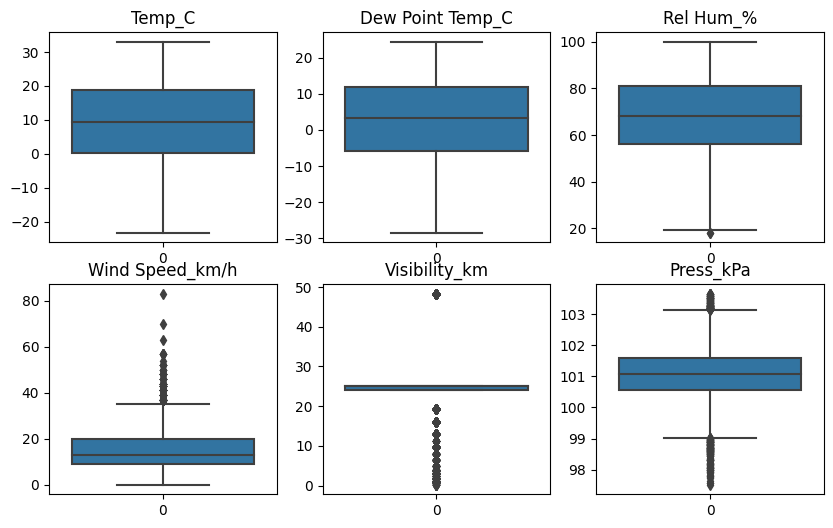

In [9]:
fig, axes = plt.subplots(2,3,figsize=(10, 6))
sns.boxplot(df_copy['Temp_C'],ax = axes[0,0])
axes[0,0].set_title('Temp_C')
sns.boxplot(df_copy['Dew Point Temp_C'],ax = axes[0,1])
axes[0,1].set_title('Dew Point Temp_C')
sns.boxplot(df_copy['Rel Hum_%'],ax = axes[0,2])
axes[0,2].set_title('Rel Hum_%')
sns.boxplot(df_copy['Wind Speed_km/h'],ax = axes[1,0])
axes[1,0].set_title('Wind Speed_km/h')
sns.boxplot(df_copy['Visibility_km'],ax = axes[1,1])
axes[1,1].set_title('Visibility_km')
sns.boxplot(df_copy['Press_kPa'],ax = axes[1,2])
axes[1,2].set_title('Press_kPa')
plt.show()
#plt.savefig(f'./boxplots/{name}.png')

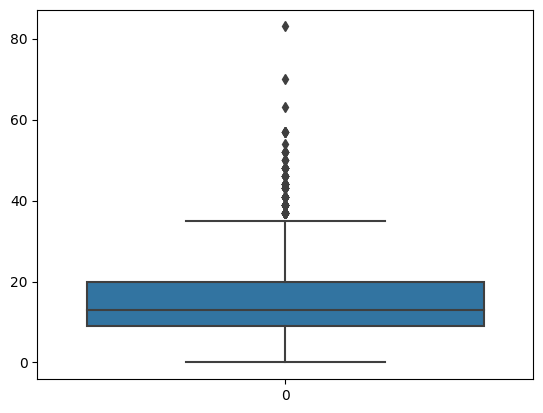

In [10]:
sns.boxplot(df_copy['Wind Speed_km/h'])
plt.show()

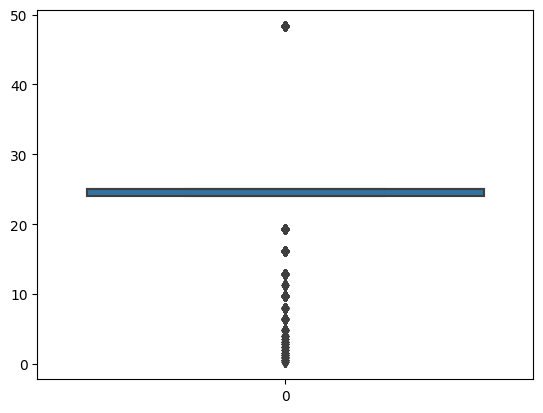

In [11]:
sns.boxplot(df_copy['Visibility_km'])
plt.show()

5. Hacer un analisis de correlacion entre las variables y adicionalmente analizar los histogramas de cada variable

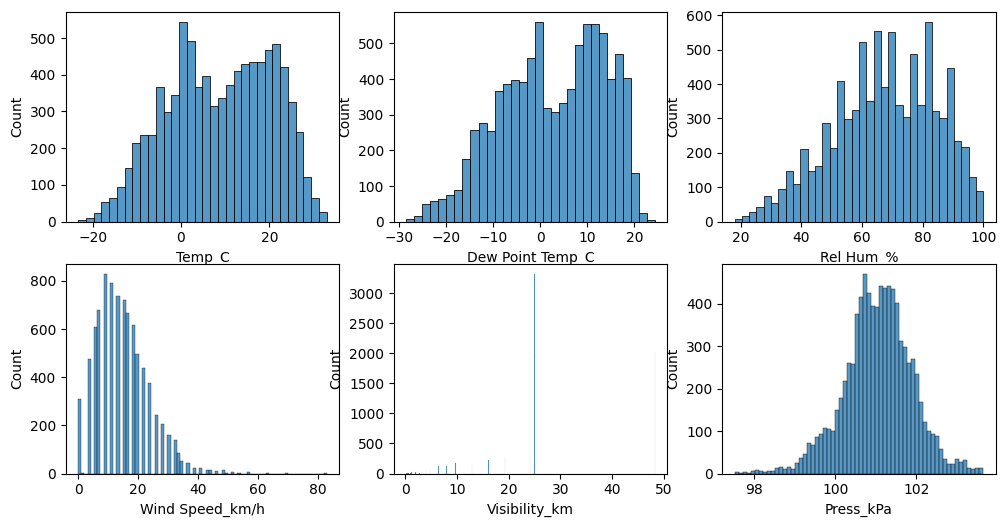

In [12]:
fig, axes = plt.subplots(2,3,figsize=(12, 6))
sns.histplot(data =df, x = df['Temp_C'],ax = axes[0,0])
sns.histplot(data =df, x = df['Dew Point Temp_C'],ax = axes[0,1])
sns.histplot(data =df, x = df['Rel Hum_%'],ax = axes[0,2])
sns.histplot(data =df, x = df['Wind Speed_km/h'],ax = axes[1,0])
sns.histplot(data =df, x = df['Visibility_km'],ax = axes[1,1])
sns.histplot(data =df, x = df['Press_kPa'],ax = axes[1,2])
plt.show()

In [ ]:
sns.pairplot(df[["Temp_C", "Dew Point Temp_C", "Rel Hum_%", "Wind Speed_km/h","Visibility_km","Press_kPa"]], diag_kind="kde")
plt.show()

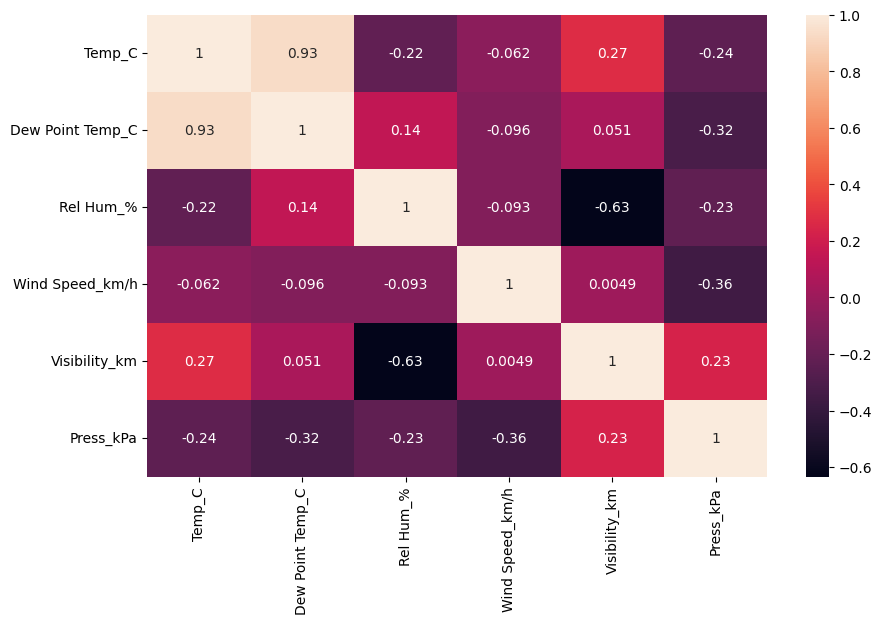

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df_copy.iloc[:,0:6].corr(), annot=True)
plt.show()

6. Realizar BoxPlots de cada variable analizando el comportamiento para cada mes a lo largo
de los años. Por ejemplo, un grafico para el mes de enero, con un Boxplot por cada año, si
son 3 años, entonces en la misma figura de enero, deben aparecer 3 BoxPlots de cada año.

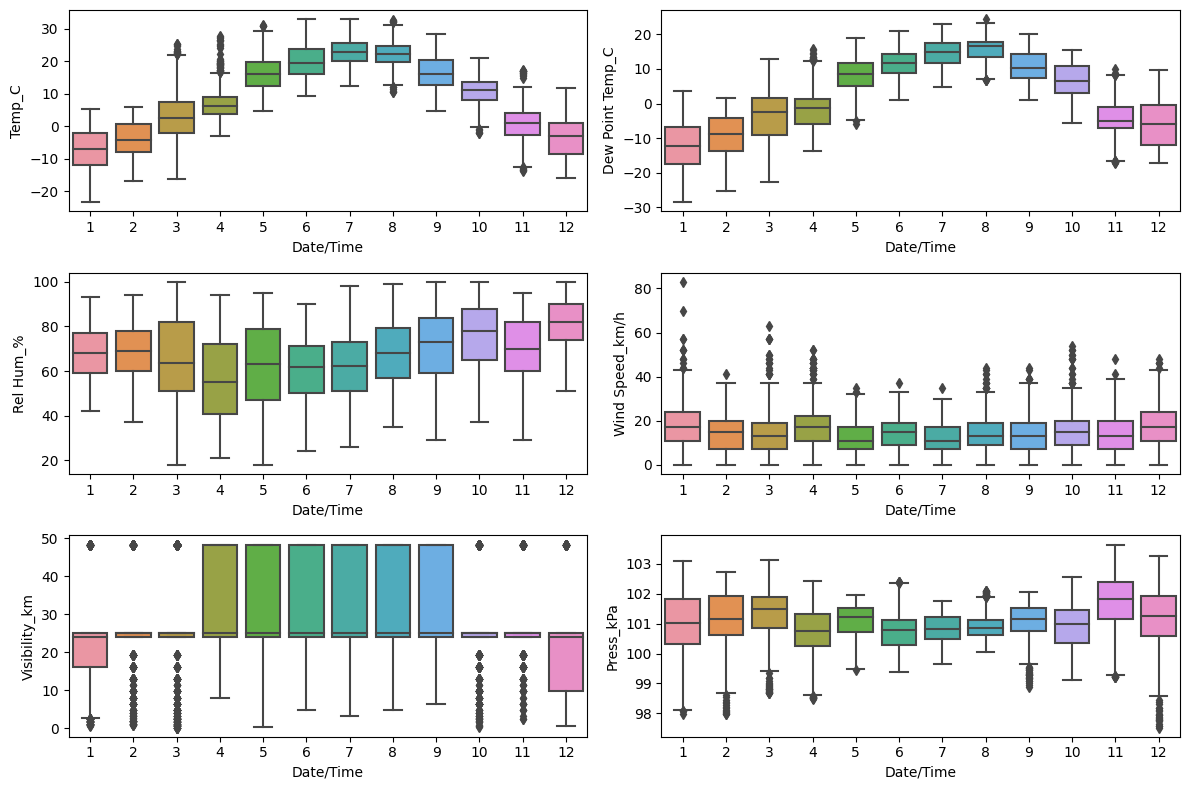

In [14]:
fig, axes = plt.subplots(3,2,figsize=(12, 8))
sns.boxplot(data = df_copy, x = df_copy.index.month, y = df_copy['Temp_C'], ax = axes[0,0])
sns.boxplot(data = df_copy, x = df_copy.index.month, y = df_copy['Dew Point Temp_C'], ax = axes[0,1])
sns.boxplot(data = df_copy, x = df_copy.index.month, y = df_copy['Rel Hum_%'], ax = axes[1,0])
sns.boxplot(data = df_copy, x = df_copy.index.month, y = df_copy['Wind Speed_km/h'], ax = axes[1,1])
sns.boxplot(data = df_copy, x = df_copy.index.month, y = df_copy['Visibility_km'], ax = axes[2,0])
sns.boxplot(data = df_copy, x = df_copy.index.month, y = df_copy['Press_kPa'], ax = axes[2,1])
fig.tight_layout()
plt.show()

7. Determinar en que mes y año se presento la mayor y menor correlacion entre las variables de analisis.

In [14]:
variables = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
MENU = """
1. Temperatura
2. Punto de rocío
3. Humedad relativa
4. Velocidad del viento
5. Visibilidad
6. Presión
"""
print(MENU)
option_1 = int(input('Ingrese la primera variable a comparar: '))
option_2 = int(input('Ingrese la segunda variable a comparar: '))

mean_corr = {'enero': 0, 'febrero': 0, 'marzo': 0, 'abril': 0, 'mayo': 0, 'junio': 0, 'julio': 0, 'agosto': 0, 'septiembre': 0, 'octubre': 0, 'noviembre': 0, 'diciembre': 0}
for i,key in enumerate(mean_corr):
    correlacion = df_copy[df_copy.index.month == i+1][variables[option_1-1]].corr(df_copy[df_copy.index.month == i+1][variables[option_2]])
    mean_corr[key] = correlacion

key_max = max(mean_corr, key=mean_corr.get)
value_max = mean_corr.get(key_max)
key_min = min(mean_corr, key=mean_corr.get)
value_min = mean_corr.get(key_min)

print(f'La correlación máxima entre {variables[option_1-1]} y {variables[option_2-1]} es {value_max} en el mes de {key_max}')
print(f'La correlación mínima  entre {variables[option_1-1]} y {variables[option_2-1]} es {value_min} en el mes de {key_min}')



1. Temperatura
2. Punto de rocío
3. Humedad relativa
4. Velocidad del viento
5. Visibilidad
6. Presión

La correlación máxima entre Temp_C y Rel Hum_% es 0.46545319521420925 en el mes de julio
La correlación mínima  entre Temp_C y Rel Hum_% es -0.2110595968918062 en el mes de marzo
